In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [14]:
#Reading the two data files
#(Change the data files here)

#data=pd.read_csv("a1_d1.csv",header=None)
data=pd.read_csv("a1_d2.csv",header=None)
#datan=data.to_numpy()
datan=data.values

In [15]:
#Functions used in the code

def slicing(data):
    x=data[:,:-1]
    y=data[:,-1]
    return x,y

def mean(x):
    m=np.mean(x,axis=0)
    return m

def covariance(data):
    mat = np.stack(data, axis=1)
    cov=np.cov(mat)
    return cov

def Sb(data,m,m1):
    S=np.shape(data)[0]*(np.dot((m1-m),(m1-m).T))
    return S

def projection(w,data):
    projection=[]
    for element in data:
        proj=np.matmul((w.T),element)
        projection.append(proj)
    return projection

def projmean(data):
    mean=np.mean(data)
    std=np.std(data)
    return mean,std

def intersection(m1,m2,std1,std2):
    a=1/(2*std1**2)-1/(2*std2**2)
    b=m2/(std2**2)-m1/(std1**2)
    c=m1**2/(2*std1**2)-m2**2/(2*std2**2)-np.log(std2/std1)
    result=np.roots([a, b, c])
    return result


In [16]:
#Seperating the class labbels and features from the dataset
x,y=slicing(datan)


#Seperating the dataset into different classes

class0=data[data.iloc[:,-1]==0]
class1=data[data.iloc[:,-1]==1]
class0,class1=class0.iloc[:,:-1],class1.iloc[:,:-1]
class0=np.asarray(class0)
class1=np.asarray(class1)

In [17]:
#Calculating overall mean and class means

m=np.expand_dims(mean(x),axis=1)
m1=np.expand_dims(mean(class0),axis=1)
m2=np.expand_dims(mean(class1),axis=1)

In [18]:
#Calculating Sw and Sb

S1_w=covariance(class0)
S2_w=covariance(class1)
Sw=S1_w+S2_w
S1_b=Sb(class0,m,m1)
S2_b=Sb(class1,m,m1)
Sb=S1_b+S2_b


In [19]:
#Eigenvalues and EigenVectors and selecting w

dot=np.dot(np.linalg.inv(Sw),Sb)
eigen_vals,eigen_vecs=np.linalg.eig(dot)
index=eigen_vals.argsort()
eigen_vals=eigen_vals[index]
eigen_vecs=eigen_vecs[:,index]
w=eigen_vecs[:,-1]


In [20]:
#Projections of classes on w and obtaining mean and std of projected points

class0p=np.expand_dims(np.asarray(projection(w,class0)),axis=1)
class1p=np.expand_dims(np.asarray(projection(w,class1)),axis=1)
projmean0,projstd0=projmean(class0p)
projmean1,projstd1=projmean(class1p)


In [21]:
#Intersection point of the Normal Distributions

result=intersection(projmean0,projmean1,projstd0,projstd1)
intersection=result[1]
class0p_=class0p[class0p> intersection]
class1p_=class1p[class1p< intersection]

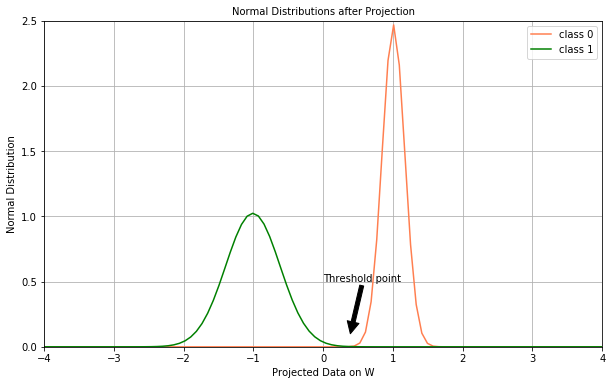

In [22]:
#Plotting the Normal Distributions of both the projected classes

norm1=norm(class0p)
norm2=norm(class1p)

x_ = np.expand_dims(np.linspace(-4, 4, 100),axis=1)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

y0 = norm.pdf(x_,projmean0,projstd0)
y1 = norm.pdf(x_,projmean1,projstd1)
ax.plot(x_,y0, color='coral',label='class 0')
ax.plot(x_,y1, color='green',label='class 1')
ax.annotate("Threshold point",xytext=(0,0.5),xy=(intersection,0.1),arrowprops={'facecolor':'black'})
plt.grid()
plt.xlim(-4,4)
plt.ylim(0,2.5)
plt.title('Normal Distributions after Projection',fontsize=10)
plt.xlabel('Projected Data on W')
plt.ylabel('Normal Distribution')
plt.legend()
fig.set_size_inches(10, 6)
plt.savefig('Normal Distributions of classes after projection')
fig.show()

In [23]:
#Obtaining the Accuracy of the model

TN=np.shape(class0p_)[0]
TP=np.shape(class1p_)[0]
N1=np.shape(class0p)[0]
N2=np.shape(class1p)[0]
Acuuracy=(TN+TP)/(N1+N2)

#F-Score
FP=N1-TN
FN=N2-TP
P=TP/(TP+FP)
R=TP/(TP+FN)
F=(2*P*R)/(P+R)


[ 0.00655686  0.01823739 -0.99981218]
0.38930280209937657
1.0
1.0


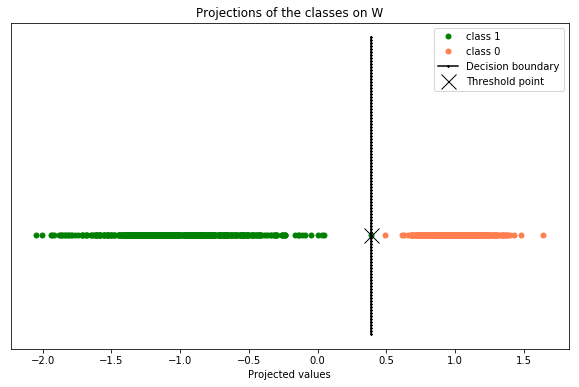

In [24]:
#Plotting projected points on a line

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.yticks([])
ax.set_xlabel('Projected values')
x_intersect = [intersection] * 100
y_intersect= np.linspace(-.02,.04,100)
ax.set_ylabel('')
ax.plot(class1p, np.zeros(len(class1p)), linestyle='None', marker='o', markersize=5, color='green',label='class 1')
ax.plot(class0p, np.zeros(len(class0p)), linestyle='None', marker='o', markersize=5, color='coral',label='class 0')
ax.plot(x_intersect, y_intersect, marker='*', markersize=2, color='black',label='Decision boundary')
ax.plot(intersection, np.zeros(1), linestyle='None', marker='x', markersize=15, color='black',label='Threshold point')
plt.title('Projections of the classes on W')
plt.legend()
fig.set_size_inches(10, 6)
plt.savefig('Projection of raw data onto W')
fig.show()

print(w)
print(intersection)
print(Acuuracy)
print(F)
